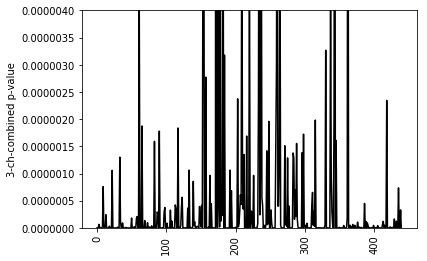

In [2]:
import os 
from scipy.stats import ks_2samp
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt
import shutil

input_path = '/Users/frodo/Downloads/initial_matlab_deckchair_scripts/ori/night_time/'
ref_img = cv2.imread(input_path + '../Mean.png',cv2.IMREAD_UNCHANGED) 

ref_hist_red = cv2.calcHist([ref_img],[0],None,[256],[0,256])
ref_hist_gre = cv2.calcHist([ref_img],[1],None,[256],[0,256])
ref_hist_blu = cv2.calcHist([ref_img],[2],None,[256],[0,256])
ref_red = [item for sublist in ref_hist_red for item in sublist]
ref_gre = [item for sublist in ref_hist_gre for item in sublist]
ref_blu = [item for sublist in ref_hist_blu for item in sublist]

filenames = []
ksstat_red = []
ksstat_gre = []
ksstat_blu = []
ksstat_combined = []
p_red = []
p_gre = []
p_blu = []
pvalue_combined = []

for filename in os.listdir(input_path):
    filenames.append(filename)
    img2proc = cv2.imread(input_path + filename, cv2.IMREAD_UNCHANGED)
    if img2proc is None: 
        print 'Could not find the image. Quitting'
        sys.exit()

    hist_red = cv2.calcHist([img2proc],[0],None,[256],[0,256])
    hist_gre = cv2.calcHist([img2proc],[1],None,[256],[0,256])
    hist_blu = cv2.calcHist([img2proc],[2],None,[256],[0,256])
    data_red = [item for sublist in hist_red for item in sublist]
    data_gre = [item for sublist in hist_gre for item in sublist]
    data_blu = [item for sublist in hist_blu for item in sublist]

    ksstat_red_i, p_red_i = ks_2samp(ref_red, data_red)
    ksstat_gre_i, p_gre_i = ks_2samp(ref_gre, data_gre)
    ksstat_blu_i, p_blu_i = ks_2samp(ref_blu, data_blu)
    pvalue_combined_i = p_red_i * p_gre_i * p_blu_i
    ksstat_combined_i =  ksstat_red_i * ksstat_gre_i * ksstat_blu_i
        
    ksstat_red.append(ksstat_red_i)
    ksstat_gre.append(ksstat_gre_i)
    ksstat_blu.append(ksstat_blu_i)
    
    p_red.append(p_red_i)
    p_gre.append(p_gre_i)
    p_blu.append(p_blu_i)

    pvalue_combined.append(pvalue_combined_i)
    ksstat_combined.append(ksstat_combined_i)
    
    if (p_red_i > 0.05) and (p_gre_i > 0.05) and (p_blu_i > 0.05) :
    # if (pvalue_combined_i > 4*1e-6):
        print 'Image ' + filename + ' could be interesting'
        shutil.copy(input_path + filename, '/Users/frodo/Desktop/' + filename)
        print 'copying to Desktop'
    
plt.figure(1)
plt.xticks(rotation=90)
plt.ylim(0.0,4*1e-6)
plt.ylabel('3-ch-combined p-value')
plt.plot(pvalue_combined, color = 'k')
# plt.subplot(311)
# plt.plot(ref_hist_gre, color = 'r')

# plt.subplot(312)
# plt.plot(p_gre, color = 'g')

# plt.subplot(313)
# plt.plot(p_blu, color = 'b')

# plt.figure(2)
# plt.plot(filenames, pvalue_combined, color = 'k')
# plt.xticks(rotation=25)
# plt.xlabel('File Names')


plt.show()

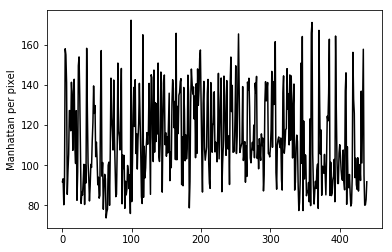

In [9]:
import sys
import cv2
import os

# from scipy.misc import imread
from scipy.linalg import norm
from scipy import sum, average
from matplotlib import pyplot as plt

input_path = '/Users/frodo/Downloads/initial_matlab_deckchair_scripts/ori/night_time/'
filenames = []
manhattan = []
manhattan_per_pixel = []
zero = []

def main():
    
    img1 = cv2.imread(input_path + '../Mean.png',cv2.IMREAD_UNCHANGED)
    # img1 = imread(input_path + '../Mean.png').astype(float)
    for filename in os.listdir(input_path):
        filenames.append(filename)
        img2 = cv2.imread(input_path + filename, cv2.IMREAD_UNCHANGED)
        # compare
#         n_m, n_0 = compare_images(img1, img2)
        n_m = compare_images(img1, img2)
#         manhattan.append(n_m)
        manhattan_per_pixel.append(n_m / img1.size)
#         zero.append(n_0)
        # print "Manhattan norm:", n_m, "/ per pixel:", n_m / img1.size
        # print "Zero norm:", n_0, "/ per pixel:", n_0 * 1.0 / img1.size
#     plt.figure(1)
#     plt.subplot(111)
#     plt.ylabel('Manhattan norm')
#     plt.xlabel(filenames, fontsize=18)
#     plt.plot(manhattan, color = 'k')
#     plt.savefig('/Users/frodo/Desktop/manhattan.png')
    plt.figure(1)
#     plt.subplot(111)
    plt.ylabel('Manhattan per pixel')
    plt.plot(manhattan_per_pixel, color = 'k')
    plt.savefig('/Users/frodo/Desktop/manhattan_per_pixel.png')
    

def compare_images(img1, img2):
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
#     z_norm = norm(diff.ravel(), 0)  # Zero norm
#     return (m_norm, z_norm)
    return (m_norm)


# def normalize(arr):
#     rng = arr.max() - arr.min()
#     amin = arr.min()
#     return (arr - amin) * 255 / rng

if __name__ == "__main__":
    main()

    